# PART 3
## Normalize data

Scran normalization: since the cell types show intrinsic differences in library sizes, we will running the normalzation on each cell type separately.

- **INPUT:**
    - ```counts_cf_ctf_gf_sf.RData``` 
    - ```anno_cells_cf_ctf_gf_sf.RData```
    - ```anno_samples_cf_ctf_gf_sf.RData```
    - ```anno_genes_cf_ctf_gf_sf.RData```
    - ```cell_relabelling.csv``` file containing unified cell type annotations. Stored in additional_input_files sub-directory.
    
    
- **OUTPUT:**

    -  ```counts_norm.mtx``` 
    -  ```anno_cells_norm.txt``` 
    -  ```anno_samples_norm.txt``` 
    -  ```anno_genes_norm.txt``` 

### load data

In [1]:
library(ggplot2)
library(SingleCellExperiment)
library(scran)
library(scater)
library(Matrix)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

In [2]:
getwd()

[1] "/home/mami/Maria/polish/clean/community-paper/src/data_preprocessing/Smillie"

In [3]:
path_to_additional_files="../../../data/Simillie/raw_data/"
path_in <- "../../../results/data_preprocessing/Similie/filtered//"
path_out <- "../../../results/data_preprocessing/Similie/normalized/"

In [4]:
# load cell relabelling file
print("load cell_relabelling")
file="cell_relabelling.csv"
cell_relabelling <- read.csv(file = paste(path_to_additional_files, file, sep="")
                             ,sep = ";"
)
rownames(cell_relabelling) <- cell_relabelling$cell_type_original
print(str(cell_relabelling))

[1] "load cell_relabelling"
'data.frame':	51 obs. of  6 variables:
 $ cell_type_original      : chr  "Stem" "TA 1" "TA 2" "Cycling TA" ...
 $ tissue_type             : chr  "Epithelial" "Epithelial" "Epithelial" "Epithelial" ...
 $ cell_type_original_color: chr  "#CB4335" "#CB4335" "#CB4335" "#CB4335" ...
 $ cell_type_color         : chr  "#c68642" "#c68642" "#c68642" "#c68642" ...
 $ population_shape        : int  19 19 19 19 19 19 19 19 19 19 ...
 $ cell_type               : chr  "Stem and multipotent cells" "Stem and multipotent cells" "Stem and multipotent cells" "Stem and multipotent cells" ...
NULL


In [5]:
# load counts
print("load counts")
load(paste0(path_in, "counts_cf_ctf_gf_sf.RData"))
print("dim(counts_cf_ctf_gf_sf)")
print(dim(counts_cf_ctf_gf_sf))

[1] "load counts"
[1] "dim(counts_cf_ctf_gf_sf)"
[1] 13861 93593


In [6]:
# load cell annotation
print("load cell annotation")
load(paste0(path_in, "anno_cells_cf_ctf_gf_sf.RData"))
print("str(anno_cells_cf_ctf_gf_sf)")
print(str(anno_cells_cf_ctf_gf_sf))

[1] "load cell annotation"
[1] "str(anno_cells_cf_ctf_gf_sf)"
'data.frame':	93593 obs. of  22 variables:
 $ cell_ID                      : chr  "N10.EpiA.AACATTGAAAGTAG" "N10.EpiA.AACCCAGACGTAAC" "N10.EpiA.AATCTCACCGCATA" "N10.EpiA.ACAATAACCGCTAA" ...
 $ cell_type_original           : chr  "Stem" "Stem" "Stem" "Stem" ...
 $ tissue_type                  : chr  "Epithelial" "Epithelial" "Epithelial" "Epithelial" ...
 $ cell_type                    : chr  "Stem and multipotent cells" "Stem and multipotent cells" "Stem and multipotent cells" "Stem and multipotent cells" ...
 $ region                       : chr  "Healthy" "Healthy" "Healthy" "Healthy" ...
 $ sample_ID                    : chr  "N10.A_Healthy" "N10.A_Healthy" "N10.A_Healthy" "N10.A_Healthy" ...
 $ health_status                : chr  "Healthy" "Healthy" "Healthy" "Healthy" ...
 $ total_counts_raw             : num  2995 6527 9262 13631 21207 ...
 $ nr_genes                     : int  1119 1534 2042 2666 3290 1773 1203 2477 3

In [7]:
# load sample annotation
print("load sample annotation")
load(paste0(path_in, "anno_samples_cf_ctf_gf_sf.RData"))
print("str(anno_samples_cf_ctf_gf_sf)")
print(str(anno_samples_cf_ctf_gf_sf))

[1] "load sample annotation"
[1] "str(anno_samples_cf_ctf_gf_sf)"
gropd_df [28 × 12] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ sample_ID                    : chr [1:28] "N10.A_Healthy" "N11.B_Healthy" "N15.A_Healthy" "N16.A_Healthy" ...
 $ patient_ID                   : chr [1:28] "N10" "N11" "N15" "N16" ...
 $ region                       : chr [1:28] "Healthy" "Healthy" "Healthy" "Healthy" ...
 $ case_or_control              : chr [1:28] "control" "control" "control" "control" ...
 $ health_status                : chr [1:28] "Healthy" "Healthy" "Healthy" "Healthy" ...
 $ nr_cells_raw                 : int [1:28] 7360 3858 4849 3233 3230 4147 4186 4125 6709 10212 ...
 $ nr_cells_cf                  : int [1:28] 5064 2821 3584 2614 2618 3443 2918 3291 5118 5551 ...
 $ nr_cells_cf_ctf              : int [1:28] 5001 2779 3527 2576 2585 3419 2880 3266 5033 5492 ...
 $ total_counts_raw_cf_ctf_gf   : num [1:28] 27866069 20263988 22019320 18624359 19596823 ...
 $ nr_celltypes_cf_ctf_gf      

In [8]:
# load gene annotation
print("load gene annotation")
load(paste0(path_in, "anno_genes_cf_ctf_gf_sf.RData"))
print("str(anno_genes_cf_ctf_gf_sf)")
print(str(anno_genes_cf_ctf_gf_sf))

[1] "load gene annotation"
[1] "str(anno_genes_cf_ctf_gf_sf)"
'data.frame':	13861 obs. of  7 variables:
 $ gene_symbol                          : chr  "A1BG-AS1" "A1CF" "A2M" "A4GALT" ...
 $ inDB                                 : logi  FALSE FALSE TRUE FALSE FALSE FALSE ...
 $ isLigand                             : logi  FALSE FALSE TRUE FALSE FALSE FALSE ...
 $ isReceptor                           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ sum_pseudobulkCellType_expr          : num  7.38 24.51 440.93 26.76 36.35 ...
 $ sum_pseudobulkCellType_expr_threshold: num  3 3 3 3 3 3 3 3 3 3 ...
 $ sum_pseudobulkCellType_expr_filter   : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
NULL


In [9]:
# color scheme for celltypes
color_celltype <- cell_relabelling$cell_type_color[!duplicated(cell_relabelling$cell_type)]
names(color_celltype) <- cell_relabelling$cell_type[!duplicated(cell_relabelling$cell_type)]

### process data 

In [10]:
counts_norm <- counts_cf_ctf_gf_sf

In [11]:
# normalize each cell type separately with scran
for(cluster in unique(anno_cells_cf_ctf_gf_sf$cell_type)){
    print(cluster)
  
    idx_cluster <- anno_cells_cf_ctf_gf_sf$cell_type == cluster

    # subset anno_cells_cf_ctf_gf_sf
    anno_cells_sub <- anno_cells_cf_ctf_gf_sf[idx_cluster,]

    # create SingleCellExperiment object
    print("create SingleCellExperiment object")
    original_sce <- SingleCellExperiment(
    assays = list(counts = as.matrix(counts_cf_ctf_gf_sf[,idx_cluster]))
    ,colData = anno_cells_sub
    )

    # comupte size factors
    print("compute size factors")
    original_sce <- computeSumFactors(original_sce
                                    #,cluster=cluster 
    )

    anno_cells_cf_ctf_gf_sf$sizeFactor[idx_cluster] <- sizeFactors(original_sce)

    # normalize
    print("scran normalization")
    original_sce <- logNormCounts(original_sce
                                ,log = FALSE
                                )
    counts_norm[,idx_cluster] <- original_sce@assays@data@listData$normcounts
}


[1] "Stem and multipotent cells"
[1] "create SingleCellExperiment object"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.7 GiB”


[1] "compute size factors"
[1] "scran normalization"
[1] "Enterocytes"
[1] "create SingleCellExperiment object"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.0 GiB”


[1] "compute size factors"
[1] "scran normalization"
[1] "Goblet"
[1] "create SingleCellExperiment object"
[1] "compute size factors"
[1] "scran normalization"
[1] "Fibroblasts"
[1] "create SingleCellExperiment object"
[1] "compute size factors"
[1] "scran normalization"
[1] "Vascular"
[1] "create SingleCellExperiment object"
[1] "compute size factors"
[1] "scran normalization"
[1] "Macrophages"
[1] "create SingleCellExperiment object"
[1] "compute size factors"
[1] "scran normalization"
[1] "Myeloid"
[1] "create SingleCellExperiment object"
[1] "compute size factors"
[1] "scran normalization"
[1] "Mast"
[1] "create SingleCellExperiment object"
[1] "compute size factors"
[1] "scran normalization"
[1] "CD4"
[1] "create SingleCellExperiment object"
[1] "compute size factors"
[1] "scran normalization"
[1] "Tregs"
[1] "create SingleCellExperiment object"
[1] "compute size factors"
[1] "scran normalization"
[1] "CD8"
[1] "create SingleCellExperiment object"
[1] "compute size factors"
[1] "s

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.7 GiB”


[1] "compute size factors"
[1] "scran normalization"
[1] "B-cells"
[1] "create SingleCellExperiment object"
[1] "compute size factors"
[1] "scran normalization"


### visualize 

[1] "construct pseudo bulks for cell types"
[1] "str(counts_pseudobulkCellType)"
'data.frame':	13861 obs. of  362 variables:
 $ Stem and multipotent cells_N10.A_Healthy   : num  0 0.15008 0.00169 0 0.22681 ...
 $ Stem and multipotent cells_N8.A_Healthy    : num  0 0.16779 0.00336 0 0.15772 ...
 $ Stem and multipotent cells_N11.B_Healthy   : num  0 0.16 0 0 0.23 ...
 $ Stem and multipotent cells_N15.A_Healthy   : num  0.00106 0.17039 0.00426 0 0.13738 ...
 $ Stem and multipotent cells_N16.A_Healthy   : num  0 0.16 0 0 0.165 ...
 $ Stem and multipotent cells_N17.A_Healthy   : num  0 0.155 0 0 0.257 ...
 $ Stem and multipotent cells_N18.A_Healthy   : num  0 0.15183 0.00262 0 0.20942 ...
 $ Stem and multipotent cells_N20.A_Healthy   : num  0 0.0858 0 0 0.0812 ...
 $ Stem and multipotent cells_N21.A_Healthy   : num  0 0.13459 0.00868 0 0.11577 ...
 $ Stem and multipotent cells_N51.B_Healthy   : num  0 0.2554 0.0183 0 0.11 ...
 $ Stem and multipotent cells_N46.A_Healthy   : num  0 0.18219 0.

[1] "visualize expression after gene filter"
'data.frame':	93593 obs. of  2 variables:
 $ log10_lib_size: num  3.48 3.81 3.97 4.13 4.33 ...
 $ sample_ID     : chr  "N10.A_Healthy" "N10.A_Healthy" "N10.A_Healthy" "N10.A_Healthy" ...
NULL


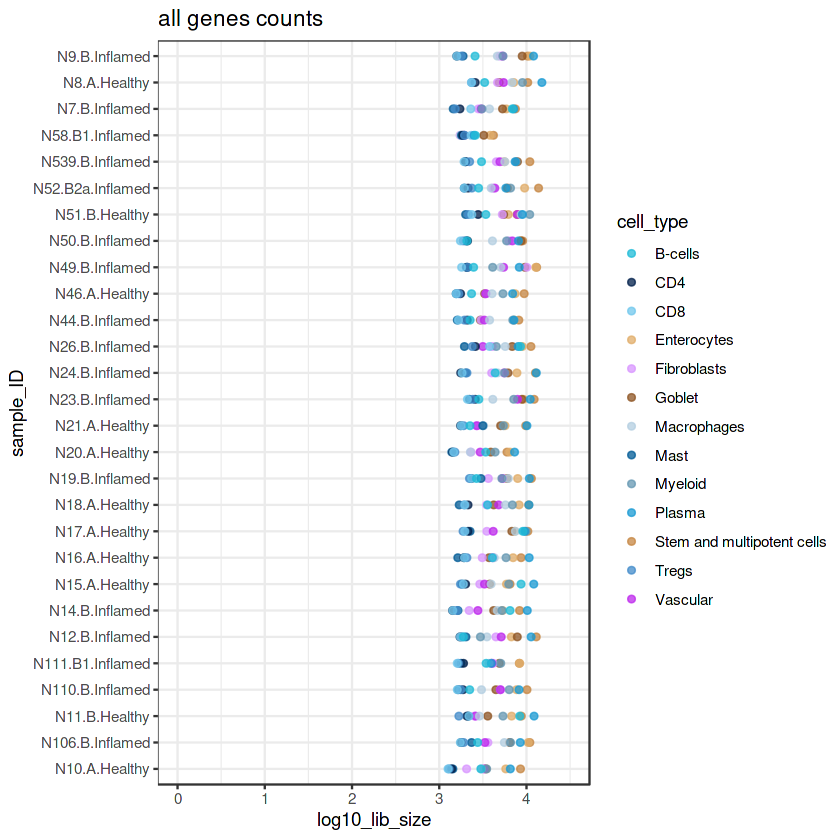

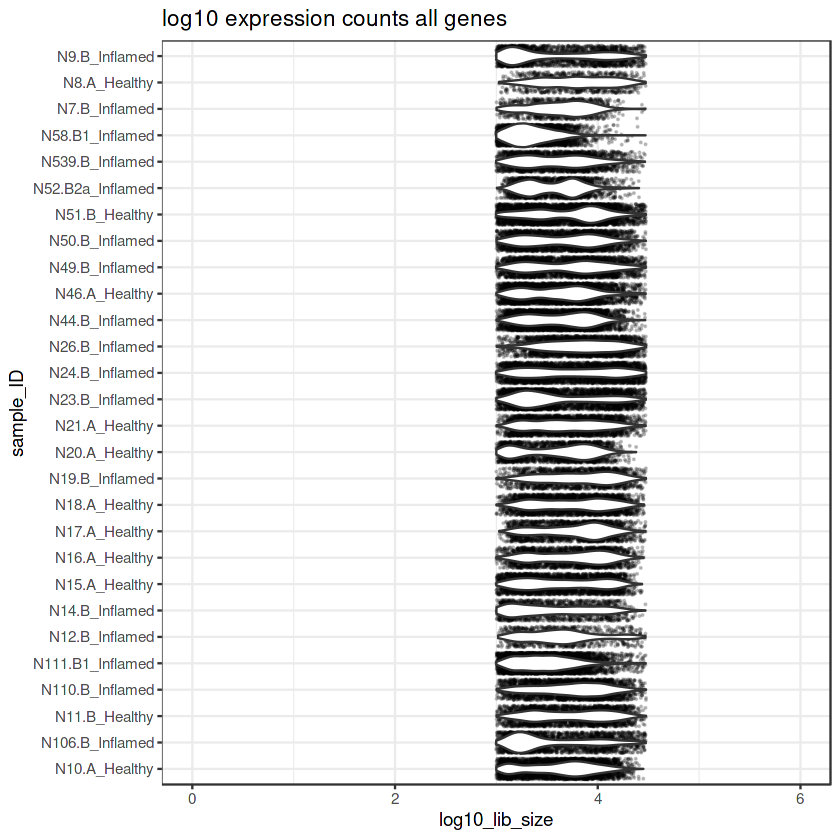

[1] "visualize expression after gene filter"
'data.frame':	93593 obs. of  2 variables:
 $ log10_lib_size: num  2.31 2.64 2.76 3.04 3.13 ...
 $ sample_ID     : chr  "N10.A_Healthy" "N10.A_Healthy" "N10.A_Healthy" "N10.A_Healthy" ...
NULL


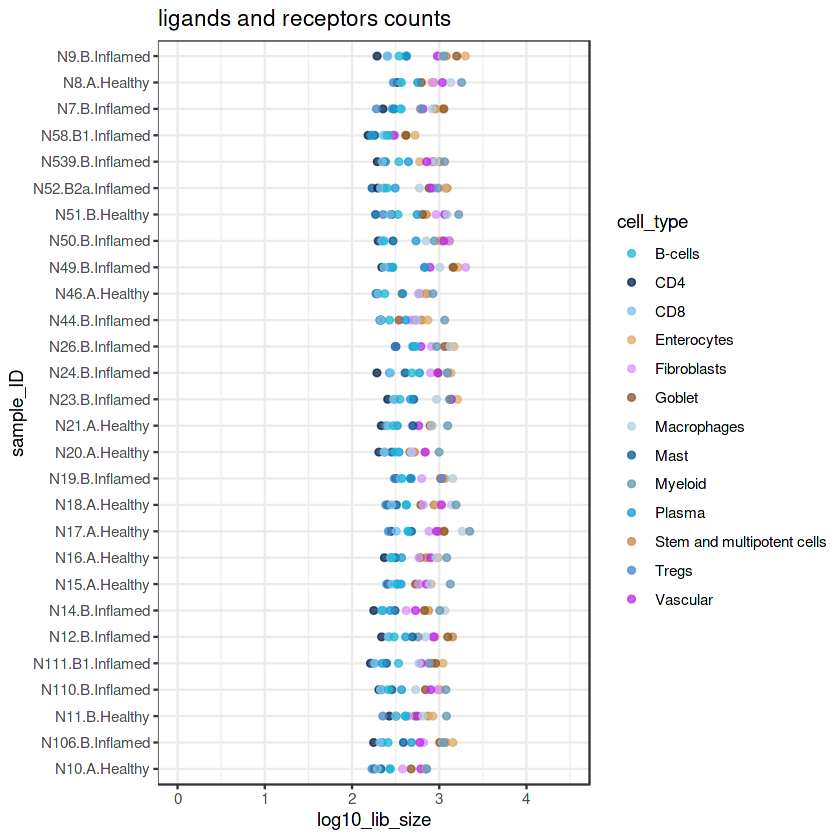

[1] "str(counts_pseudobulkCellType)"
'data.frame':	13861 obs. of  362 variables:
 $ Stem and multipotent cells_N10.A_Healthy   : num  0 0.1872 0.00124 0 0.26874 ...
 $ Stem and multipotent cells_N8.A_Healthy    : num  0 0.18148 0.00149 0 0.20908 ...
 $ Stem and multipotent cells_N11.B_Healthy   : num  0 0.18 0 0 0.286 ...
 $ Stem and multipotent cells_N15.A_Healthy   : num  0.00396 0.27498 0.00854 0 0.24938 ...
 $ Stem and multipotent cells_N16.A_Healthy   : num  0 0.2 0 0 0.207 ...
 $ Stem and multipotent cells_N17.A_Healthy   : num  0 0.173 0 0 0.353 ...
 $ Stem and multipotent cells_N18.A_Healthy   : num  0 0.1439 0.00191 0 0.22183 ...
 $ Stem and multipotent cells_N20.A_Healthy   : num  0 0.164 0 0 0.184 ...
 $ Stem and multipotent cells_N21.A_Healthy   : num  0 0.1381 0.0108 0 0.1076 ...
 $ Stem and multipotent cells_N51.B_Healthy   : num  0 0.3617 0.0246 0 0.1543 ...
 $ Stem and multipotent cells_N46.A_Healthy   : num  0 0.18247 0.00138 0 0.11736 ...
 $ Enterocytes_N10.A_Healthy 

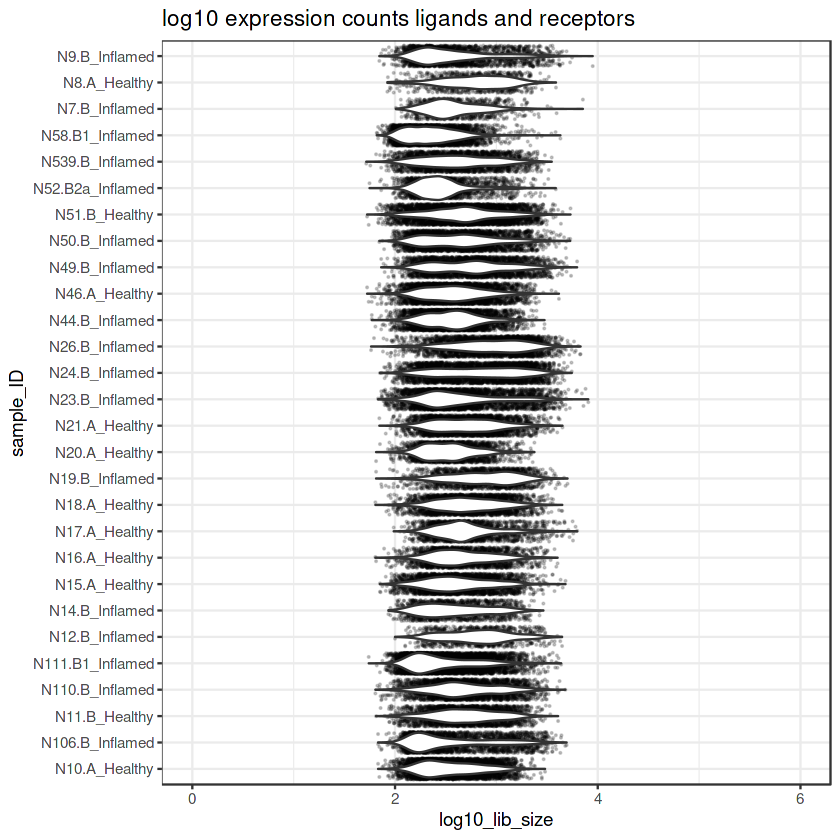

[1] "visualize expression after gene filter"
'data.frame':	93593 obs. of  2 variables:
 $ log10_lib_size: num  3.91 4.05 4.03 3.98 4.01 ...
 $ sample_ID     : chr  "N10.A_Healthy" "N10.A_Healthy" "N10.A_Healthy" "N10.A_Healthy" ...
NULL


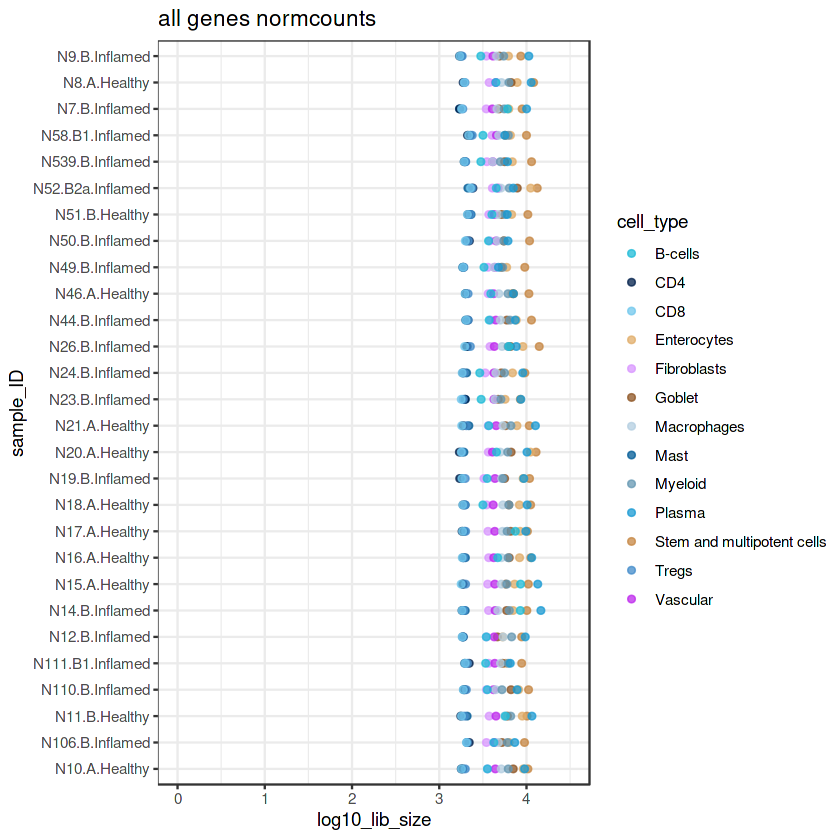

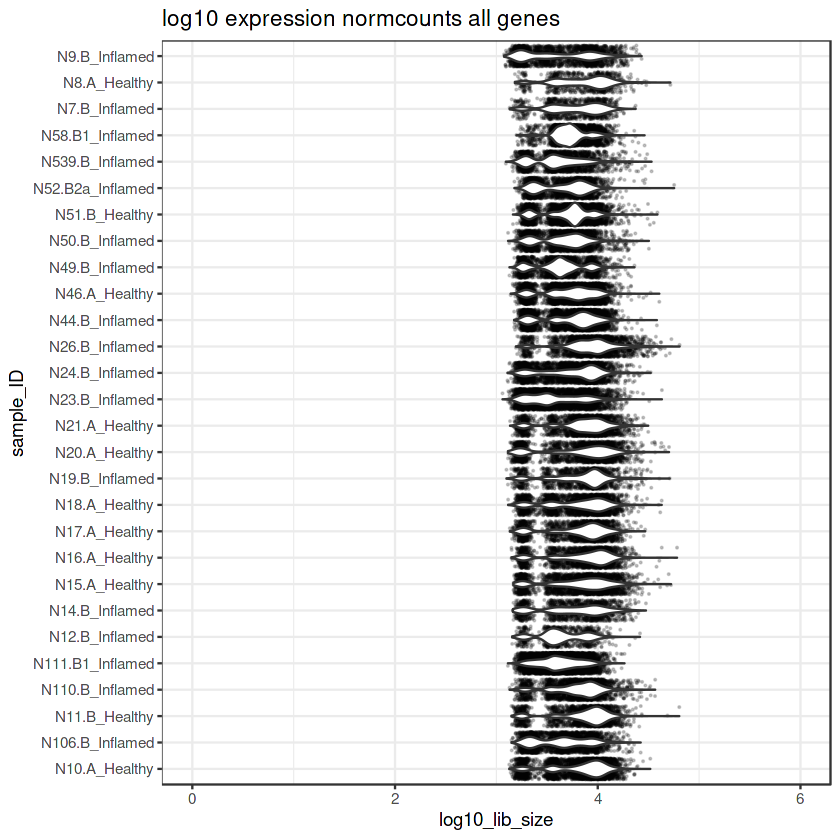

[1] "visualize expression after gene filter"
'data.frame':	93593 obs. of  2 variables:
 $ log10_lib_size: num  2.75 2.88 2.83 2.88 2.82 ...
 $ sample_ID     : chr  "N10.A_Healthy" "N10.A_Healthy" "N10.A_Healthy" "N10.A_Healthy" ...
NULL


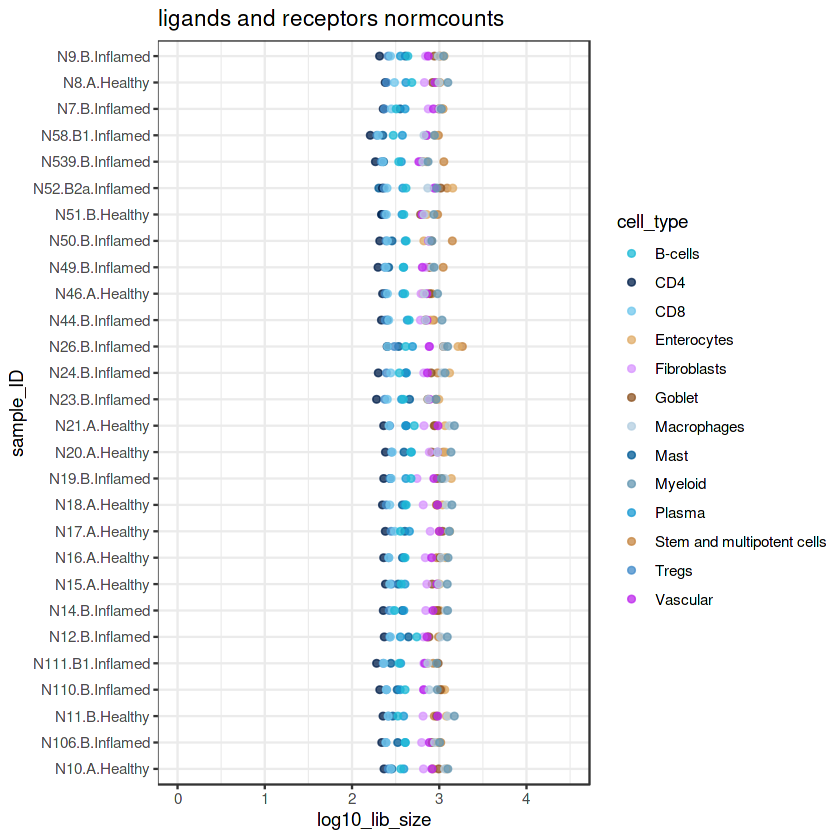

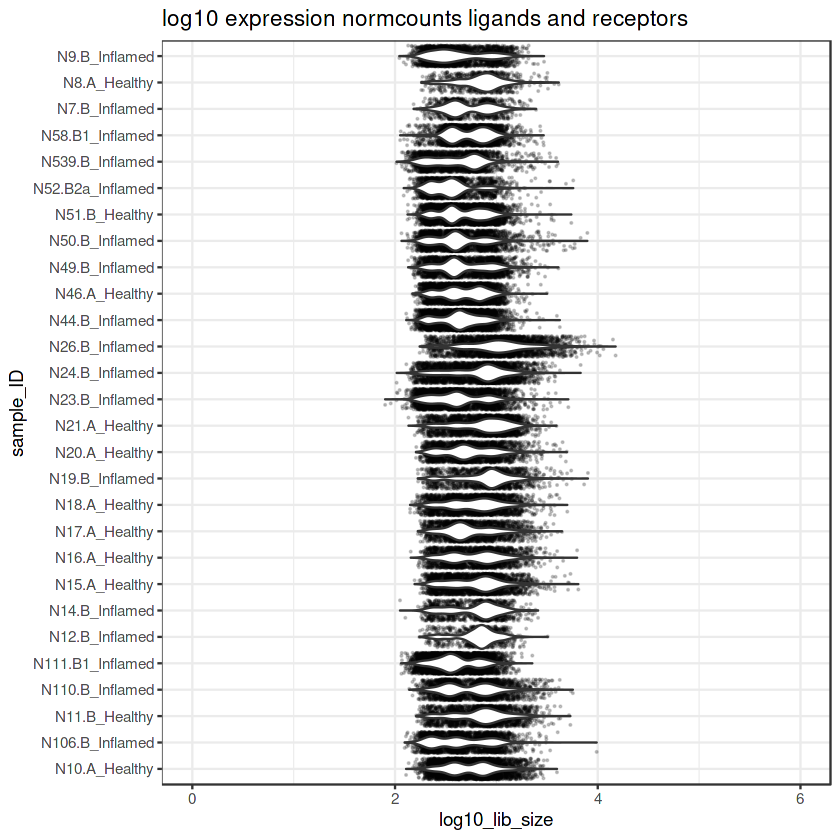

In [12]:
print("construct pseudo bulks for cell types")
for(counts_type in c("counts"
                ,"normcounts")
){
  
  ifelse(counts_type == "counts"
         ,counts <- counts_cf_ctf_gf_sf
         ,counts <- counts_norm)
  
  cell_type_IDs <- unique(anno_cells_cf_ctf_gf_sf$cell_type_ID)
  counts_pseudobulkCellType <- as.data.frame(matrix(,nrow = nrow(counts)
                                                    ,ncol = length(cell_type_IDs)
  )
  )
  i <- 1
  for(cell_type_ID in cell_type_IDs){
    #print(cell_type_ID)
    
    idx_cell_type_ID <- anno_cells_cf_ctf_gf_sf$cell_type_ID == cell_type_ID
    
    if(sum(idx_cell_type_ID) == 0){
      counts_pseudobulkCellType[,i] <- 0
    } else if( sum(idx_cell_type_ID) == 1){
      counts_pseudobulkCellType[,i] <- counts[,idx_cell_type_ID]
    } else {
      counts_pseudobulkCellType[,i] <- rowMeans(counts[,idx_cell_type_ID])
    }
    
    i <- i+1
  }
  colnames(counts_pseudobulkCellType) <- cell_type_IDs
  rownames(counts_pseudobulkCellType) <- rownames(counts)
  print("str(counts_pseudobulkCellType)")
  print(str(counts_pseudobulkCellType))
  
  # visualize expression in pseudo sorted bulk
  print("visualize expression in pseudo-bulk cell type")
  for(genes_type in c("all genes"
                      ,"ligands and receptors")){
    ifelse(genes_type == "all genes"
           ,idx_genes <- rep(T,nrow(anno_genes_cf_ctf_gf_sf))
           ,idx_genes <- anno_genes_cf_ctf_gf_sf$isLigand | anno_genes_cf_ctf_gf_sf$isReceptor
    )
    
    my_sampes <- sub("_.*", "", colnames(counts_pseudobulkCellType))
    df <- data.frame(log10_lib_size = log10(colSums(counts_pseudobulkCellType[idx_genes,]) +1)
                     ,sample_ID = sub("_", ".", sub("^[^_]+_", "", colnames(counts_pseudobulkCellType)))
                     
                     ,cell_type = sub("_.*"
                                      ,""
                                      ,colnames(counts_pseudobulkCellType)
                     )
    )
    
    print(ggplot(data = df
                 ,aes(x = sample_ID
                      ,y = log10_lib_size
                      ,color = cell_type
                 )
    ) +
      geom_jitter(height = NULL
                  ,width = 0
                  ,alpha = 0.75) +
      ggtitle(paste(genes_type
                    ,counts_type)) +
      coord_flip() +
      ylim(c(0,4.5)) +
      scale_color_manual(values = color_celltype)+
      theme_bw()
    )
    
    
    # visualize expression after gene filter
    print("visualize expression after gene filter")
    df <- data.frame(log10_lib_size = log10(colSums(counts[idx_genes,]) +1)
                     ,sample_ID = anno_cells_cf_ctf_gf_sf$sample_ID
    )
    print(str(df))
    
    print(ggplot(data = df
                 ,aes(x = sample_ID
                      ,y = log10_lib_size
                 )
    ) +
      geom_jitter(height = NULL
                  ,size = 0.1
                  ,alpha = 0.2) +
      geom_violin() + 
      ggtitle(paste("log10 expression"
                    ,counts_type
                    ,genes_type)) +
      coord_flip() +
      ylim(c(0,6))+
      theme_bw()
    )
    rm(df)
    
  }
  
}


In [13]:
anno_cells_norm <- anno_cells_cf_ctf_gf_sf
anno_genes_norm <- anno_genes_cf_ctf_gf_sf
anno_samples_norm <- anno_samples_cf_ctf_gf_sf

### export

In [14]:
# export ####
print("export")
print("export counts_norm.mtx")
writeMM(obj = Matrix(as.matrix(counts_norm)
                     , sparse=TRUE)
        , file = paste0(path_out, "counts_norm.mtx")
        )

[1] "export"
[1] "export counts_norm.mtx"


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 9.7 GiB”


NULL

In [15]:
# export anno_cells_norm
print("export anno_cells_norm.txt")
write.table(anno_cells_norm
            ,file = paste0(path_out, "anno_cells_norm.txt")
             ,sep = "\t"
            ,row.names = FALSE )

[1] "export anno_cells_norm.txt"


In [16]:
# export anno_genes
print("export anno_genes_norm.txt")
write.table(anno_genes_norm
            ,file = paste0(path_out, "anno_genes_norm.txt")
            ,sep = "\t"
            ,row.names = FALSE
)

[1] "export anno_genes_norm.txt"


In [17]:
# export anno_samples
print("export anno_samples_norm.txt")
write.table(anno_samples_norm
            ,file = paste0(path_out, "anno_samples_norm.txt")
            ,sep = "\t"
            ,row.names = FALSE
)

[1] "export anno_samples_norm.txt"
